# 📌 04 – Model Evaluation & Visualization

“This notebook evaluates the trained models through performance metrics and visualizations such as classification reports and confusion matrices.”

*– Imports*

In [11]:
import sys, os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from features import build_features

*— Load dataset + features :*

In [12]:
df = pd.read_csv("../data/csic_database.csv")
df["label"] = df["label"].astype(int)

X, feature_cols = build_features(df)
y = df["label"]

print("✔ Dataset loaded")
print(f"✔ Samples: {len(df)}")
print(f"✔ Features used: {feature_cols}")

✔ Dataset loaded
✔ Samples: 123042
✔ Features used: ['url_length', 'param_count', 'has_special_chars', 'has_sql', 'method_encoded', 'payload_length', 'url_entropy']


*— Load models :*

In [13]:
rf = joblib.load("../models/rf_model.joblib")
iso = joblib.load("../models/iso_model.joblib")

print("✔ Models loaded successfully")

✔ Models loaded successfully


*— Evaluate RandomForest (supervised) :*

In [14]:
preds = rf.predict(X)

print("\n===  RandomForest – Classification Report ===")
print(classification_report(y, preds))


===  RandomForest – Classification Report ===
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     88000
           1       0.98      0.42      0.59     35042

    accuracy                           0.83    123042
   macro avg       0.90      0.71      0.74    123042
weighted avg       0.86      0.83      0.81    123042



*– Confusion Matrix :*

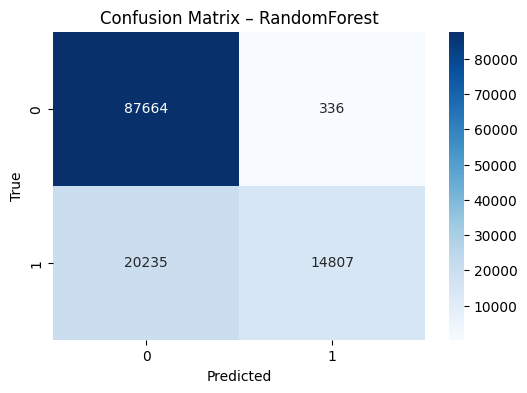

In [15]:

cm = confusion_matrix(y, preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – RandomForest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


*– Feature Importance :*

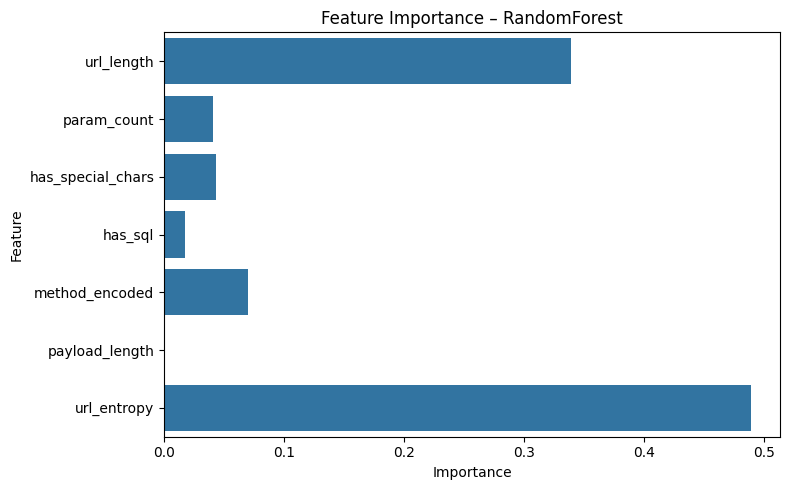

In [16]:
importances = rf.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_cols, orient="h")
plt.title("Feature Importance – RandomForest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

*– Evaluate IsolationForest (unsupervised) :*

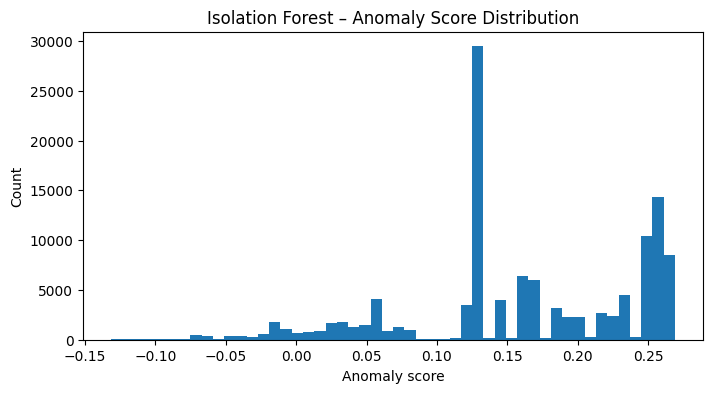

In [17]:
iso_scores = iso.decision_function(X)

plt.figure(figsize=(8,4))
plt.hist(iso_scores, bins=50)
plt.title("Isolation Forest – Anomaly Score Distribution")
plt.xlabel("Anomaly score")
plt.ylabel("Count")
plt.show()

*-IsolationForest predicted anomalies:*

In [18]:
df["iso_prediction"] = iso.predict(X) 

anomalies = df[df["iso_prediction"] == -1]

print("===  Example Anomalous Requests (IsolationForest) ===")
anomalies.head()

===  Example Anomalous Requests (IsolationForest) ===


,method,url,protocol,host,user_agent,cookie,content_type,content_length,body,label,iso_prediction
15,GET,http://localhost:8080/tienda1/publico/pagar.js...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=535529056CAF606E044AC8C76F6E6C40,NaN,NaN,NaN,0,-1
59,GET,http://localhost:8080/tienda1/publico/pagar.js...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=2A0DAF6374B66B52F63973D50A5EF0B1,NaN,NaN,NaN,0,-1
103,GET,http://localhost:8080/tienda1/publico/pagar.js...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=DFEF8EFFD2A0DBCA9D5B5D32AA9069FD,NaN,NaN,NaN,0,-1
147,GET,http://localhost:8080/tienda1/publico/pagar.js...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=87A7AC2C0B5A6275061869EEE08205EA,NaN,NaN,NaN,0,-1
191,GET,http://localhost:8080/tienda1/publico/pagar.js...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=7F92565D8389691925440DE29B886958,NaN,NaN,NaN,0,-1


In [19]:
print("✔ Model evaluation completed.")

✔ Model evaluation completed.
